Defining properties of the 2DOF systems of two springs in series

In [1]:
import numpy as np
import matplotlib.pyplot as plt

m1 = 1.
m2 = 1.
k1 = 1
k2 = 1

epsilon = 0.01 # nonlinear
#epsilon = 0 # linear

M = np.array([[m1, 0],
              [0, m2]])
Minv = np.linalg.inv(M)

def f1(x1):
    return k1*(x1 + epsilon*x1**3)

def df1_dx1(x1):
    return k1*(1 + 3*epsilon*x1**2)

def f2(x1, x2):
    return k2*((x2 - x1) + epsilon*(x2 - x1)**3)

def df2_dx1(x1, x2):
    return k2*(-1 + 3*epsilon*(x2 - x1)**2*(-1))

def df2_dx2(x1, x2):
    return k2*(1 + 3*epsilon*(x2 - x1)**2)

def h1(x1, x2):
    return f1(x1) - f2(x1, x2)

def h2(x1, x2):
    return f2(x1, x2)

def dh1_dx1(x1, x2):
    return df1_dx1(x1) - df2_dx1(x1, x2)

def dh1_dx2(x1, x2):
    return  - df2_dx2(x1, x2)

def dh2_dx1(x1, x2):
    return df2_dx1(x1, x2)

def dh2_dx2(x1, x2):
    return df2_dx2(x1, x2)

def dK_da(x1, x2):
    return np.array([[dh1_dx1(x1, x2), dh1_dx2(x1, x2)],
                     [dh2_dx1(x1, x2), dh2_dx2(x1, x2)]])

Initializing

In [2]:
u0 = np.array([1, 10])
v0 = np.zeros(2)

tmax = 25
t = np.linspace(0, tmax, 100) # Delta t = 25/100
dt = t[1] - t[0]

Direct single-step method

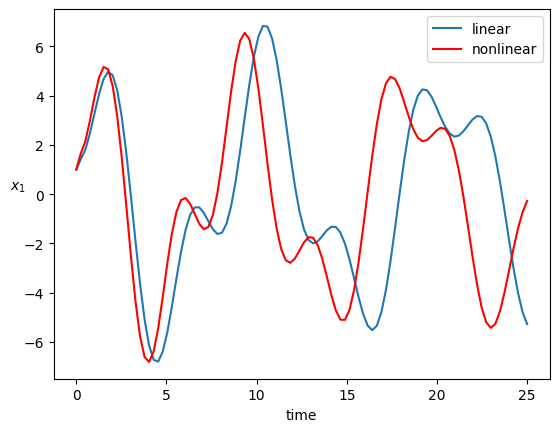

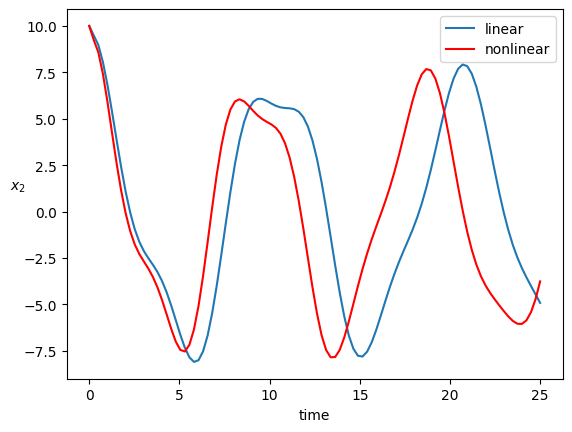

In [3]:
beta = 1
gamma = 0.6

def Newmark_Newton_Raphson_solver():
    u = np.zeros((2, t.shape[0]))
    v = np.zeros((2, t.shape[0]))
    a = np.zeros((2, t.shape[0]))

    u[:, 0] = u0
    v[:, 0] = v0
    for i in range(0, t.shape[0]-1):
        da = np.array([1e6, 1e6])
        x1 = u[0, i]
        x2 = u[1, i]
        # predictor
        uP = u[:, i] + dt*v[:, i] + dt**2/2*(1 - 2*beta)*a[:, i]
        vP = v[:, i] + (1 - gamma)*dt*a[:, i] 
        
        while abs(da[1]) > 1e-5:    
            # update acceleration based on residual
            ha = np.vstack([h1(x1, x2), h2(x1, x2)])
            Ra = M @ a[:, i+1] + ha.flatten()
            # calculating the Jacobian (dR/da)
            Ja = M + dt**2*beta*dK_da(x1, x2)
            # solving for da
            da[:] = np.linalg.solve(Ja, -Ra)

            # correction of acceleration such that Ra->0
            a[:, i+1] += da

            # corrector
            u[:, i+1] = uP + beta*dt**2*a[:, i+1]
            v[:, i+1] = vP + gamma*dt*a[:, i+1]    

            x1 = u[0, i+1]
            x2 = u[1, i+1]
    return u

# linear
epsilon = 0
u = Newmark_Newton_Raphson_solver()
x1 = u[0, :]
x2 = u[1, :]
plt.figure()
plt.plot(t, x1, label='linear')
plt.xlabel('time')
plt.ylabel('$x_1$', rotation='horizontal')

# nonlinear
epsilon = 0.01
u = Newmark_Newton_Raphson_solver()
x1 = u[0, :]
x2 = u[1, :]
plt.plot(t, x1, 'r', label='nonlinear')
plt.xlabel('time')
plt.ylabel('$x_1$', rotation='horizontal')
plt.legend()
plt.show()

# linear
epsilon = 0
u = Newmark_Newton_Raphson_solver()
x1 = u[0, :]
x2 = u[1, :]
plt.figure()
plt.plot(t, x2, label='linear')
plt.xlabel('time')
plt.ylabel('$x_2$', rotation='horizontal')

# nonlinear
epsilon = 0.01
u = Newmark_Newton_Raphson_solver()
x1 = u[0, :]
x2 = u[1, :]
plt.plot(t, x2, 'r', label='nonlinear')
plt.xlabel('time')
plt.ylabel('$x_2$', rotation='horizontal')
plt.legend()
plt.show()
